In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


%matplotlib inline

In [2]:
# Improt statements for plotly charts
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

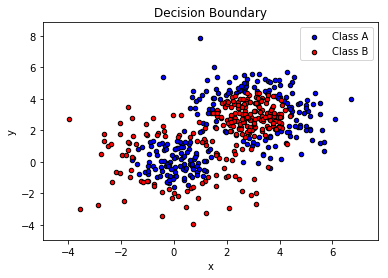

In [3]:
# Import statements for data science aspect of this lesson
import numpy as np
import matplotlib.pyplot as plt

# SKLearn imports. SKLearn will be the primary data science library we will be using 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset from random blobs
X1, y1 = make_gaussian_quantiles(cov=2,
                                n_samples=200, n_features=2, 
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3,3), cov=1.5,
                                n_samples=300, n_features=2, 
                                n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Set colours as lue and red (b and r)
plot_colors = "br"

#Class names for now are just A and B
class_names = "AB"

plt.axis("tight")
plot_step = 0.02

# Plot the training point color coded by class
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y==i)
    plt.scatter(X[idx, 0], X[idx, 1],
               c=c, cmap=plt.cm.Paired,
               s=20, edgecolor='k',
               label="Class %s" % n)
    
# Get minimum and maximum from the dataset
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1

# Set x limit and y limit from minima and maxima 
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Set legend and labelling of the chart
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()

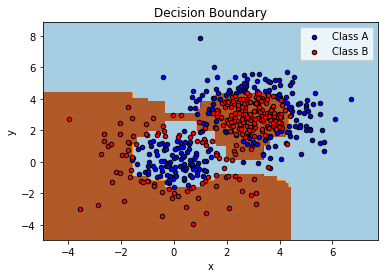

In [4]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                        algorithm="SAMME",
                        n_estimators=200)

bdt.fit(X, y)

# Create contours for every point 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))

# Fill in the contours with our predictions from AdaBoost
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot all the ponts
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where (y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
               c=c, cmap=plt.cm.Paired,
               s=20, edgecolor='k',
               label="Class %s" % n)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()